# Prediccion de Cancelacion de Reservas:

### Objetivo:
El objetivo del proyecto es realizar un modelo de regresion logistica para determinar cuando una reserva de hotel sera cancelada  y cuales son los factores que contribuyen a ese comportamiento.

Desde el punto de vista del negocio es importante para los hoteles poder determinar la cantidad de reservas que fallaran y la cantidad de reservas que no fallaran para poder estimar si en determinado momento necesitaran mas colaboradores u otro tipo de variable operativa, como la cantidad de comida para el desayuno o lugares de parking disponibles.
En este caso ,para los hoteles es mas relevante tener un modelo que prediga bien cuando una reserva no sera cancelada en lugar de predecir bien cuando una reserva sera cancelada ,por tres motivos:

#####  1)La mayoria de las reservas son efectivamente confirmadas.
#####  2)Es peor desde el punto de vista de la reputacion de un establecimiento tener clientes que van al hotel pero no tiene su habitacion lista porque el establecimiento pensaba que no iban asistir.
#####  3)El hotel puede decidir no disponibilizar las habitaciones cuya probabilidad de cancelacion sea alta,pero puede decidir disminuir su operativa de empleados y diferentes servicios,en caso que esas reservas sea hagan efectivas las personas tendrian su habitacion pero su experiencia en el establecimiento seria mala porque el hotel no estaba esperando a esos huespedes.

### Dataset:
Los datos que se utilizan fueron tomados del articulo "Hotel Booking Demand Datasets" elebaorado por Nuno Antonio,Ana de Almeida y Luis Nunes y cuenta con informacion de reservas de hoteles en la ciudad de Lisboa en Portugal durante el 1 de Julio del 2015 hasta el 31 de Agosto del 2017.
En total el dataset incluye 79.330 observaciones y 31 variables que son las siguientes:

###### Adults:	
Numero de huespedes adultos de la reserva.
###### Agent:
Identificacion del agente de viajes que hizo la reserva.
###### ArrivalDateDayOfMonth:
Dia del mes de la fecha de llegada.
###### ArrivalDateMonth:
Mes de la fecha de la llegada.Toma valores categoricos de Enero a Diciembre.	
###### ArrivalDateWeekNumber:	
Numero de la semana de la fecha de llegada.
###### ArrivalDateYear:
Año de la fecha de llegada de la reserva. 
###### AssignedRoomType:
Tipo de cuarto asignado,puede variar del tipo de cuarto reservado.
###### Babies:
Cantidad de bebes que figuran en la reserva.
###### BookingChanges:
Cantidad de cambios que tuvo la reserva(Ejemplo:Cantidad de huespedes,tipo de comida,cuarto etc).	
###### Children:	
Cantidad de niños que aparecen en la reserva.
###### Company:
Identificador de la empresa que hizo la reserva o paga la estadia.
###### Country:	
Pais de residencia de la persona que hizo la reserva.
###### CustomerType:
Tipo de cliente que realizo la reserva:
1)Contract
2)Group 
3)Transient
4)Transient-party
###### DaysInWaitingList:
Cantidad de dias en que la reserva estuvo en lista de espera para ser confirmada.
###### DepositType	:
Tipo de deposito que hizo la persona para asegurar la reserva,tres tipos:
1)No Deposit
2)Non Refund
3)Refundable
###### DistributionChannel:
Canal de distribucion de la reserva,pueden ser agentes de viajes o empresas de tours.
###### IsCanceled:
Indicador sobre si la reserva fue cancelada o no(Variable Objetivo).
###### IsRepeatedGuest	:
Indica si la reserva fue hecha por una persona que ya fue huesped del hotel.	
###### LeadTime:
Cantidad de dias de diferencia que existen entre la fecha que la reserva fue realizada y la fecha de llegada al hotel.
###### MarketSegment:
Segmentacion de mercado de la persona que realizo la reserva.Similar a DistributionChannel
###### Meal:
Tipo de paquete que reservo,puede ser 4 categorias:
Undefined/SC – Sin paquete;
BB – Desayuno Incluido;
HB – Desayuno mas Cena;
FB – Desayuno,almuerzo y cena
###### PreviousBookingsNotCanceled	:
Cantidad de reservas no canceladas antes de realizar la reserva.
###### PreviousCancellations:
Cantidad de reservas canceladas antes de relizar la reserva.
###### RequiredCardParkingSpaces:
Cantidad de espacios de parking especificados en la reserva.
###### ReservationStatus:
Estado de la reserva:
Canceled – Reserva cancelada por el usuario
Check-Out –Cliente hizo el checkin y el checkout;
No-Show –  Cliente no fue en la fecha de la reserva pero aviso al establecimiento
###### ReservationStatusDate:
Fecha en la que el utlimo status de la reserva fue actualizado.
###### ReservedRoomType:
Tipo de cuarto reservado.
###### StaysInWeekendNights:
Cantidad de noches en fin de semana que tiene la reserva.
###### StaysInWeekNights:
Cantidad de noches entre semana que tiene la reserva.
###### TotalOfSpecialRequests:
Numero de pedidos especiales realizados en la reserva(Ejemplo:Dos camas matrimoniales,Checkin temprano)

### Modelo a utilizar
Dado que se trata de un problema en donde la variable objetivo es una variable categorica se utilizara un modelo de regresion logisitca.
Se tomara la metrica de Accuracy como principal metrica para evaluar los modelos realizados.

## Importacion de librerias

In [144]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split

import seaborn as sns
##display plots and visualizations that are generated by the matplotlib library within the current output cell. This code is often used at the beginning of a program to allow plots to be displayed in the output of the program.
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from numpy import mean
from numpy import std
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier
from collections import Counter
from sklearn.metrics import accuracy_score,recall_score,f1_score

In [145]:
# Cargo el archivo excel y lo transformo en un dataframe:
Data=pd.read_excel("H2_1.xlsx")

custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.color_palette("Blues", as_cmap=True)
sns.set_theme(style="whitegrid", rc=custom_params)

## Analisis preliminar de datos

In [146]:
Data.head()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,0,6,2015,July,27,1,0,2,1,0.0,...,No Deposit,6,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-03
1,1,88,2015,July,27,1,0,4,2,0.0,...,No Deposit,9,NULL,0,Transient,76.5,0,1,Canceled,2015-07-01
2,1,65,2015,July,27,1,0,4,1,0.0,...,No Deposit,9,NULL,0,Transient,68.0,0,1,Canceled,2015-04-30
3,1,92,2015,July,27,1,2,4,2,0.0,...,No Deposit,9,NULL,0,Transient,76.5,0,2,Canceled,2015-06-23
4,1,100,2015,July,27,2,0,2,2,0.0,...,No Deposit,9,NULL,0,Transient,76.5,0,1,Canceled,2015-04-02


Como habiamos mencionado antes,el dataset contiene 31 variables

In [147]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79330 entries, 0 to 79329
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   IsCanceled                   79330 non-null  int64         
 1   LeadTime                     79330 non-null  int64         
 2   ArrivalDateYear              79330 non-null  int64         
 3   ArrivalDateMonth             79330 non-null  object        
 4   ArrivalDateWeekNumber        79330 non-null  int64         
 5   ArrivalDateDayOfMonth        79330 non-null  int64         
 6   StaysInWeekendNights         79330 non-null  int64         
 7   StaysInWeekNights            79330 non-null  int64         
 8   Adults                       79330 non-null  int64         
 9   Children                     79326 non-null  float64       
 10  Babies                       79330 non-null  int64         
 11  Meal                         79330 non-nu

Se confirma que existen 79.330 observaciones para las 31 variables.

## Analisis Descriptivo

In [148]:
Data.describe()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,BookingChanges,DaysInWaitingList,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests
count,79330.000000,79330.000000,79330.000000,79330.000000,79330.000000,79330.000000,79330.000000,79330.000000,79326.000000,79330.000000,79330.000000,79330.000000,79330.000000,79330.000000,79330.000000,79330.000000,79330.000000,79330.000000
mean,0.417270,109.735724,2016.174285,27.177449,15.786625,0.795185,2.182957,1.850977,0.091370,0.004941,0.025615,0.079743,0.132371,0.187369,3.226774,105.304465,0.024367,0.546918
std,0.493111,110.948526,0.699181,13.398523,8.728451,0.885026,1.456416,0.509292,0.372177,0.084323,0.157983,0.415472,1.693411,0.608620,20.870890,43.602954,0.154919,0.780776
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,23.000000,2016.000000,17.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,79.200000,0.000000,0.000000
50%,0.000000,74.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,99.900000,0.000000,0.000000
75%,1.000000,163.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,629.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,4.000000,3.000000,10.000000,1.000000,21.000000,72.000000,21.000000,391.000000,5400.000000,3.000000,5.000000


### Insights preliminares:

1)La semana 27 parace ser la semana en donde las personas mas reservas han hecho desde 2015 al 2017.
Esto tiene sentido porque esa semana coincide con el verano en Portugal.

2)En promedio las reservas son realizadas con 109 previos a la fecha de llegada(Variable LeadTime).

3)Existen variables que parecen tener una variacion muy pequeña como son Babies,RequiredCarParkingSpaces ,Children y Booking Changes.

4)En promedio las personas se alojan dos noches entre semana y una noche durante los fines de semana y suelen ser dos adultos.

## Verificacion de valores unicos en columnas

Lo que vamos a verificar ahora son los valores unicos que existen para cada variable y verificar que sea corecto.Por ejemplo,la variable objetivo IsCanceled solo podria tomar dos valores unicos,1 y 0.Por otro lado,las variables de mes solo podria tomar 12 valores unicos.
Para las variables como cantida de adultos en una reserva este tipo de analisis no nos arrojara mucha informacion,pero si es importante para saber si las variables temporales son correctas.En concreto,deberiamos tener que la variable de años solo tenga 3 años unicos(2015,2016 y 2017),la variable de meses solo 12 valores unicos y la variable de semanas puede tener hasta 53 valores unicos,esto es porque existe un año bisiesto sino deberian ser 52 semanas.
Tambien es relevante para variables categoricas como Meal(Solo se ofrecen 4) ,ReservationStatus ,IsRepeatedGuest y DepositType.

### Valores Unicos de columnas:

In [149]:
for i in Data.columns:
  print(i, len(Data[i].unique()))

IsCanceled 2
LeadTime 453
ArrivalDateYear 3
ArrivalDateMonth 12
ArrivalDateWeekNumber 53
ArrivalDateDayOfMonth 31
StaysInWeekendNights 14
StaysInWeekNights 29
Adults 5
Children 5
Babies 5
Meal 4
Country 167
MarketSegment 8
DistributionChannel 5
IsRepeatedGuest 2
PreviousCancellations 10
PreviousBookingsNotCanceled 73
ReservedRoomType 8
AssignedRoomType 9
BookingChanges 21
DepositType 3
Agent 224
Company 208
DaysInWaitingList 115
CustomerType 4
ADR 5405
RequiredCarParkingSpaces 4
TotalOfSpecialRequests 6
ReservationStatus 3
ReservationStatusDate 864


No parece existir nada extraño a simple vista.Podemos confirmar que existen 3 años diferentes,12 meses y 53 semanas(2016 fue año bisiesto por lo que tuvo 53 semanas) y 31 dias.

## Columnas con muy pocos valores

In [150]:
print(Data.shape,Data.shape[0])
for i in Data.columns:
  percentage = float(len(Data[i].unique())) / Data.shape[0] * 100
  print('%s, %d, %.2f%%' % (i,len(Data[i].unique()), percentage))

(79330, 31) 79330
IsCanceled, 2, 0.00%
LeadTime, 453, 0.57%
ArrivalDateYear, 3, 0.00%
ArrivalDateMonth, 12, 0.02%
ArrivalDateWeekNumber, 53, 0.07%
ArrivalDateDayOfMonth, 31, 0.04%
StaysInWeekendNights, 14, 0.02%
StaysInWeekNights, 29, 0.04%
Adults, 5, 0.01%
Children, 5, 0.01%
Babies, 5, 0.01%
Meal, 4, 0.01%
Country, 167, 0.21%
MarketSegment, 8, 0.01%
DistributionChannel, 5, 0.01%
IsRepeatedGuest, 2, 0.00%
PreviousCancellations, 10, 0.01%
PreviousBookingsNotCanceled, 73, 0.09%
ReservedRoomType, 8, 0.01%
AssignedRoomType, 9, 0.01%
BookingChanges, 21, 0.03%
DepositType, 3, 0.00%
Agent, 224, 0.28%
Company, 208, 0.26%
DaysInWaitingList, 115, 0.14%
CustomerType, 4, 0.01%
ADR, 5405, 6.81%
RequiredCarParkingSpaces, 4, 0.01%
TotalOfSpecialRequests, 6, 0.01%
ReservationStatus, 3, 0.00%
ReservationStatusDate, 864, 1.09%


## Deteccion de valores duplicados

In [151]:
dups = Data.duplicated()
print(dups.any())
print("*"*10)
print(Data[dups])

True
**********
       IsCanceled  LeadTime  ArrivalDateYear ArrivalDateMonth  \
9               1        62             2015             July   
12              0        43             2015             July   
17              0        43             2015             July   
18              0        43             2015             July   
22              0        43             2015             July   
...           ...       ...              ...              ...   
79289           0       186             2017           August   
79292           0        63             2017           August   
79293           0        63             2017           August   
79294           0        63             2017           August   
79313           0       175             2017           August   

       ArrivalDateWeekNumber  ArrivalDateDayOfMonth  StaysInWeekendNights  \
9                         27                      2                     2   
12                        27                     

En esta evaluacion si encontramos la existencia de filas duplicadas,en particular pareceria haber 25.902 filas duplicadas por lo que tendriamos luego que elimanarlas.

In [152]:
df=Data.drop_duplicates(keep='first', inplace=False, ignore_index=False)

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53428 entries, 0 to 79329
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   IsCanceled                   53428 non-null  int64         
 1   LeadTime                     53428 non-null  int64         
 2   ArrivalDateYear              53428 non-null  int64         
 3   ArrivalDateMonth             53428 non-null  object        
 4   ArrivalDateWeekNumber        53428 non-null  int64         
 5   ArrivalDateDayOfMonth        53428 non-null  int64         
 6   StaysInWeekendNights         53428 non-null  int64         
 7   StaysInWeekNights            53428 non-null  int64         
 8   Adults                       53428 non-null  int64         
 9   Children                     53424 non-null  float64       
 10  Babies                       53428 non-null  int64         
 11  Meal                         53428 non-nu

Al eliminar los valores duplicados el dataset finalmente queda con 53.428 valores unicos.

## Deteccion de valores faltantes

In [154]:
for i in df.columns:
  n_miss = df[i].isnull().sum()
  perc = n_miss / df.shape[0] * 100
  print('> %s, Missing: %d (%.1f%%)' % (i, n_miss, perc))

> IsCanceled, Missing: 0 (0.0%)
> LeadTime, Missing: 0 (0.0%)
> ArrivalDateYear, Missing: 0 (0.0%)
> ArrivalDateMonth, Missing: 0 (0.0%)
> ArrivalDateWeekNumber, Missing: 0 (0.0%)
> ArrivalDateDayOfMonth, Missing: 0 (0.0%)
> StaysInWeekendNights, Missing: 0 (0.0%)
> StaysInWeekNights, Missing: 0 (0.0%)
> Adults, Missing: 0 (0.0%)
> Children, Missing: 4 (0.0%)
> Babies, Missing: 0 (0.0%)
> Meal, Missing: 0 (0.0%)
> Country, Missing: 6 (0.0%)
> MarketSegment, Missing: 0 (0.0%)
> DistributionChannel, Missing: 0 (0.0%)
> IsRepeatedGuest, Missing: 0 (0.0%)
> PreviousCancellations, Missing: 0 (0.0%)
> PreviousBookingsNotCanceled, Missing: 0 (0.0%)
> ReservedRoomType, Missing: 0 (0.0%)
> AssignedRoomType, Missing: 0 (0.0%)
> BookingChanges, Missing: 0 (0.0%)
> DepositType, Missing: 0 (0.0%)
> Agent, Missing: 0 (0.0%)
> Company, Missing: 0 (0.0%)
> DaysInWaitingList, Missing: 0 (0.0%)
> CustomerType, Missing: 0 (0.0%)
> ADR, Missing: 0 (0.0%)
> RequiredCarParkingSpaces, Missing: 0 (0.0%)
> Tot

Detectamos que no existen valores faltantes salvo en 6 observaciones en la variable Country.

### Llenado valores faltantes 
Vamos a llenar estos valores de pais con el pais con mayoritariamente mas reservas que en este caso es Portugal.

In [155]:
df.loc[df['Country'].isnull(), 'Country'] = 'PRT'

## Deteccion de Outliers 

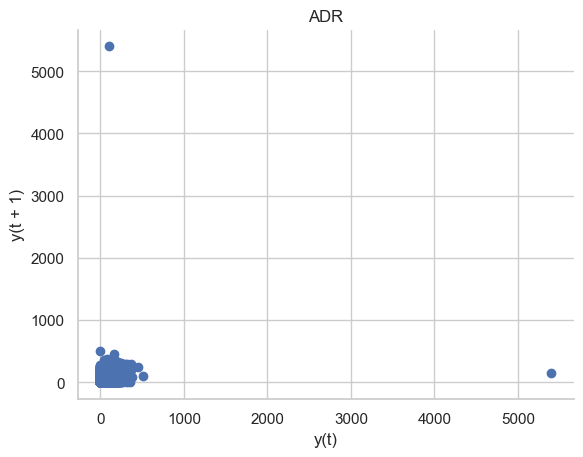

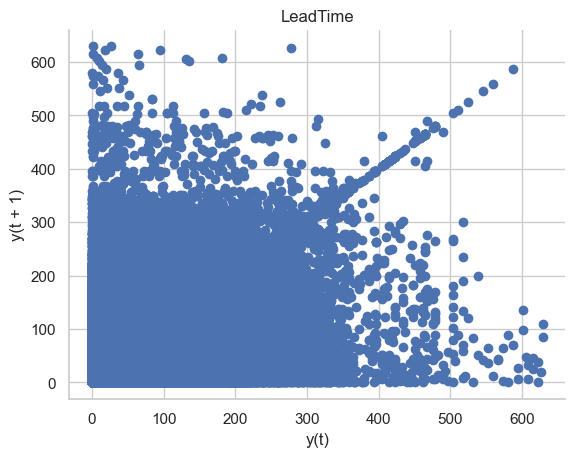

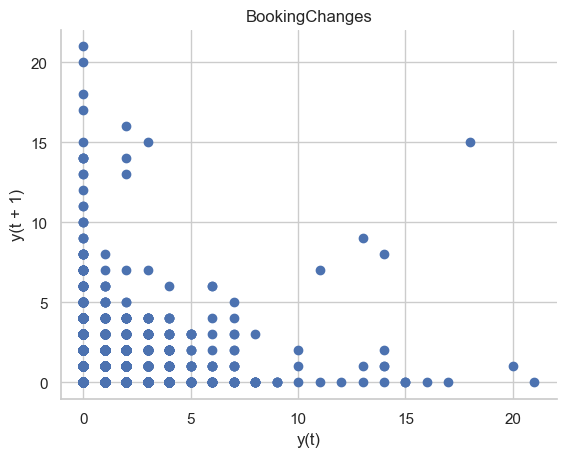

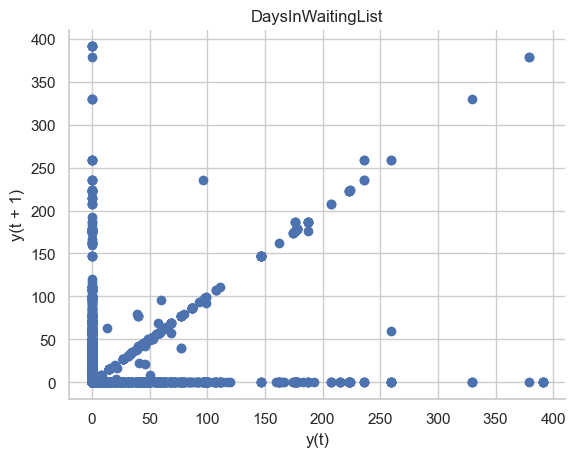

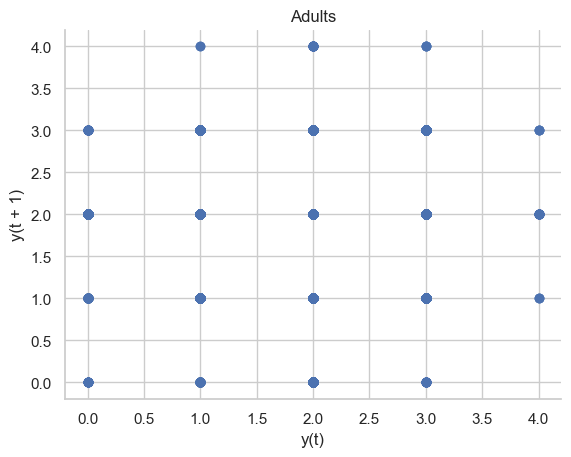

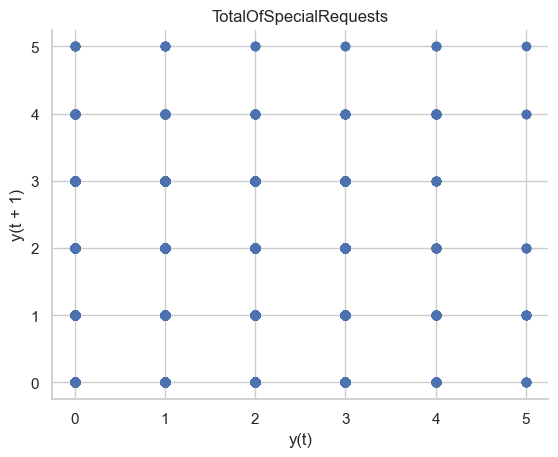

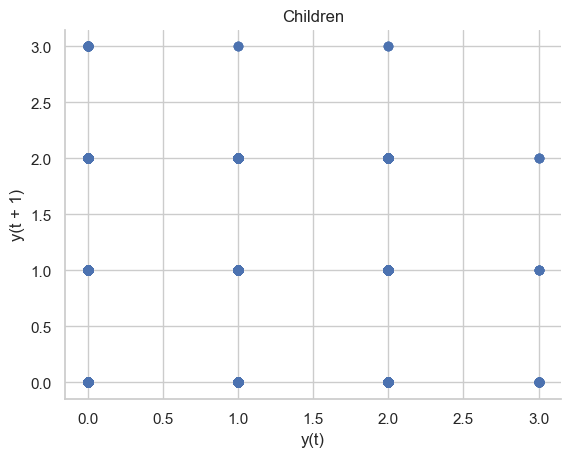

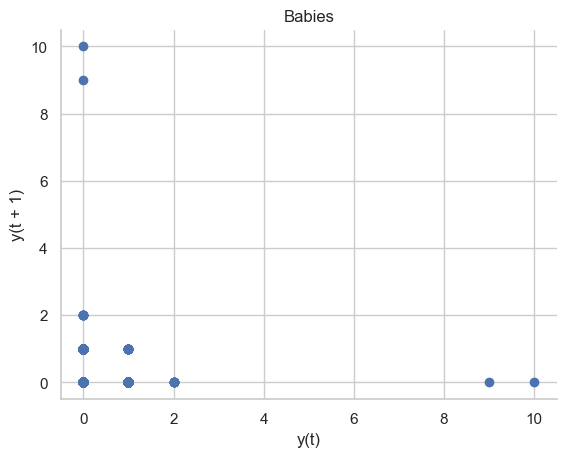

In [156]:
#Check outliers
import matplotlib.pyplot as plt

from pandas.plotting import lag_plot
lag_plot(df['ADR'])
plt.title('ADR')
plt.show()

lag_plot(df['LeadTime'])
plt.title('LeadTime')
plt.show()

lag_plot(df['BookingChanges'])
plt.title('BookingChanges')
plt.show()

lag_plot(df['DaysInWaitingList'])
plt.title('DaysInWaitingList')
plt.show()

lag_plot(df['Adults'])
plt.title('Adults')
plt.show()

lag_plot(df['TotalOfSpecialRequests'])
plt.title('TotalOfSpecialRequests')
plt.show()

lag_plot(df['Children'])
plt.title('Children')
plt.show()

lag_plot(df['Babies'])
plt.title('Babies')
plt.show()

### Encontramos algunos valores atipicos en las variables numericas:

#### ADR(Avarege Day Rate):
En este caso existe una observacion con un valor de 5400,lo que significaria que alguien pagaria una tarifa diaria de 5.400 euros por la noche.Esto parece un error de imputacion,pues la reserva fue solo para una noche y realizada para dos adultos.Lo que haremos en este caso es sustituir este valor con la media de ADR para una reserva de dos huespedes en esa misma semana.
Existen a su vez reservas cuyo valor por noche es 0,sobre este punto volveremos luego para analizar si este valor se corresponde con algun grupo en particular,por ejemplo si fueron regalos corporativos.

#### Leadtime:
En este caso llama la atencion que haya reservas con mas 600 dias de anticipacion,aunque teniendo en cuenta que existen reservas por medio de agencias de viaje es una posibilidad que se hagan reservas con tanta antelacion.

#### BookingChanges:
Para esta variable existen reservas con hasta 20 cambios desde la fecha de su creacion,en principio es un numero elevado pero luego si analizamos la relacion de esta variable con Leadtime vemos que las reservas con mas cambios se relacionan en parte con haber reservado con mucho tiempo de anticipacion.Tiene sentido que una reservar hecha hace 2 años pueda sufrir tantos numeros de cambios.

#### DaysInWaitingList:
Al igual que en el caso anterior,parece extraño que una persona este mas de 300 dias para ser confirmado de su reserva,sin embargo esto se puede explicar tambien con la variable Leadtime,reservas realizadas con mucha anticipacion requieren de una confirmacion mas larga.

#### Adults:
Esta variable muestra la cantidad de adultos que figuran en la reserva.Como se puede ver existen reservas en las cuales no hay adultos(la variable es 0) y la variable Children tambien es 0,en definitiva es una reserva para 0 huespedes.En este caso vamos a presindir de estas observaciones pues no tienen mucho sentido que una reserva no tenga huespedes.

#### Children:
En esta variable no se verifica nada extraño,hay valores logicos dentro de una reserva de hotel.

#### Babies:
En este caso se verifican valores atipicos,pues existe una reserva para 9 bebes y un adulto y ademas otra reserva para 10 bebes y un adulto.Esto podria ser comprensible si el ADR(Costo de Noche promedio) fuera elevado,pues se necesita una habitacion muy grande para 10 personas,sin embargo es igual al promedio de otras reservas.Dado que esta variable tiene una varianza muy pequeña(90% de las observaciones su valor es 0) vamos a presindir de estas dos observaciones.

#### TotalOfSpecialRequests:
En este caso no se verfica nada que llame la atencion,en general las reservas no tienen pedidos especiales y en el caso de los haya no parecen ser numeros que llamen la atencion.

### Tratamiento de outliers

Vamos a quitar las reservas que figuran con la variable Babies mayor a 9,y vamos a quitar las reservas sin huespedes(Con variables Adults y Babies en 0).
Por otro lado para la variable ADR la reserva de 5.400 euros vamos a utilizar la mediana de ADR para esa semana.

In [256]:
#Babies:
df = df.drop(df[df.Babies >=9].index)    
#Adults
df = df.loc[~((df['Adults'] == 0) & (df['Children']==0 & (df['Babies']==0)))] 

#ADR
mean_ADR = df[df['ArrivalDateWeekNumber'] == 13]['ADR'].mean()
df.loc[df['ADR'] == 5400, 'ADR'] = mean_ADR


## Distribucion de variables Numericas:

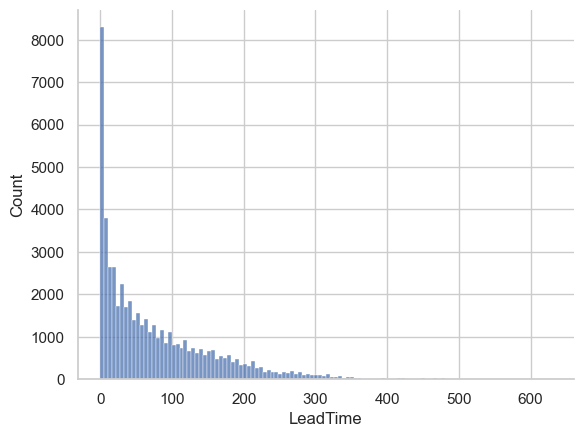

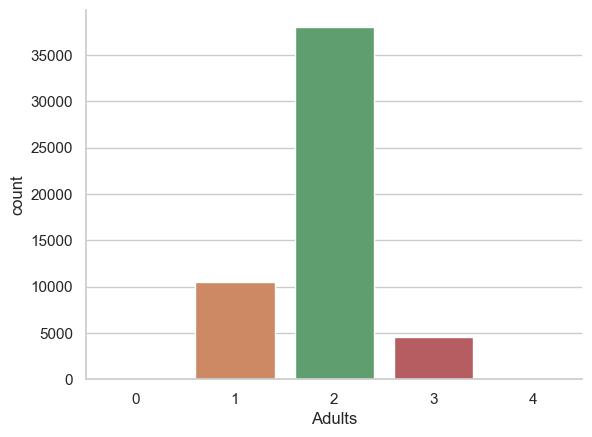

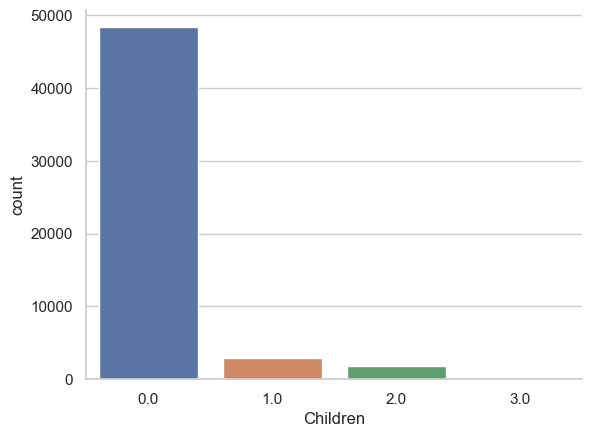

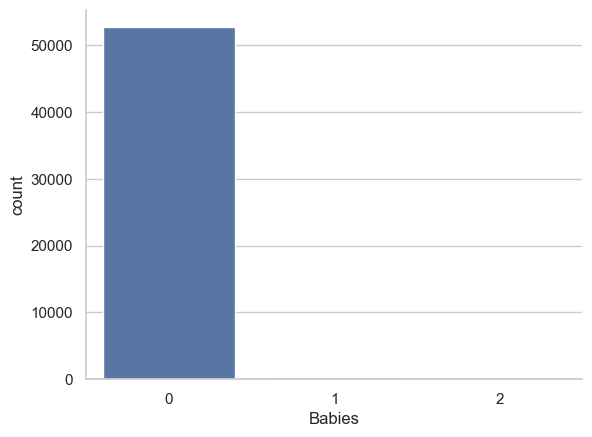

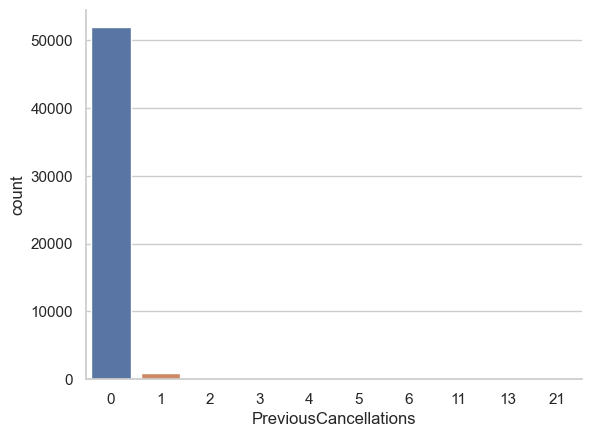

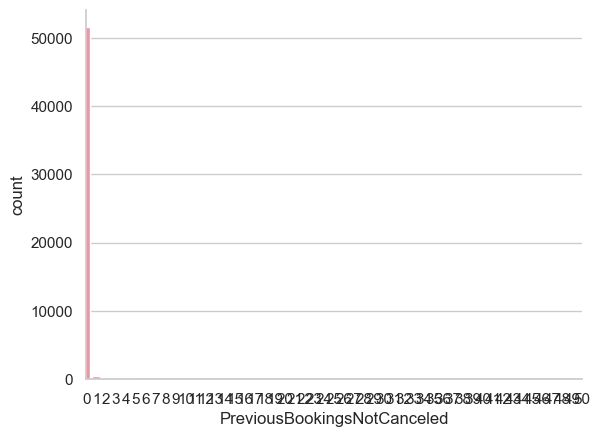

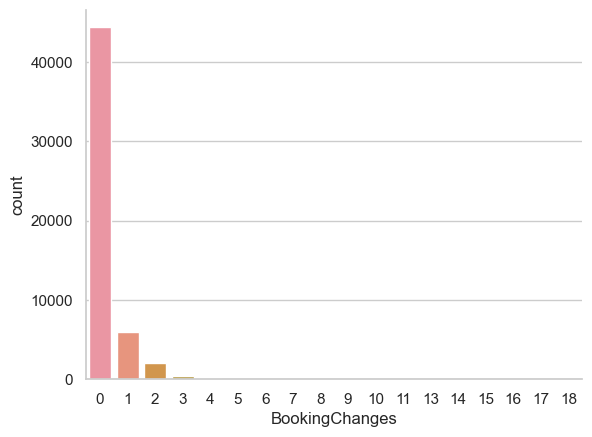

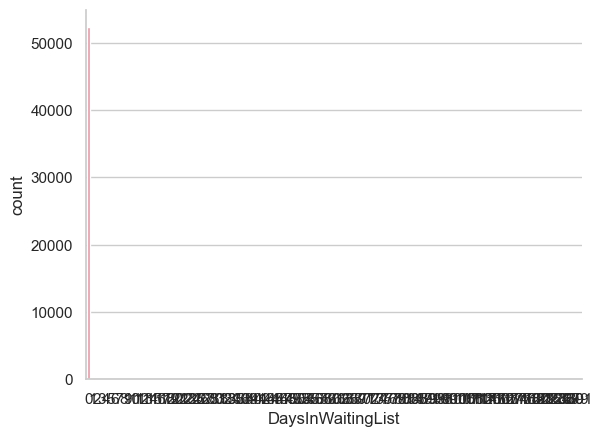

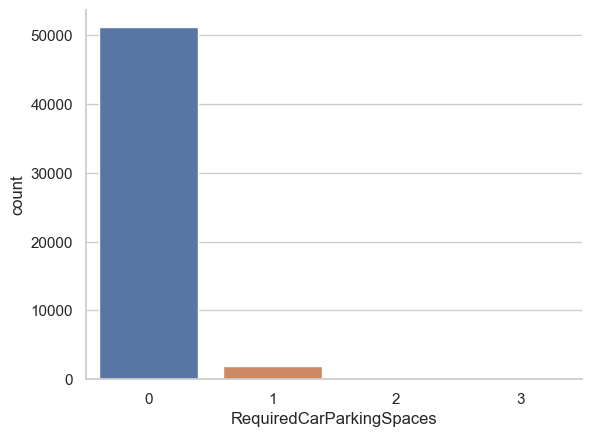

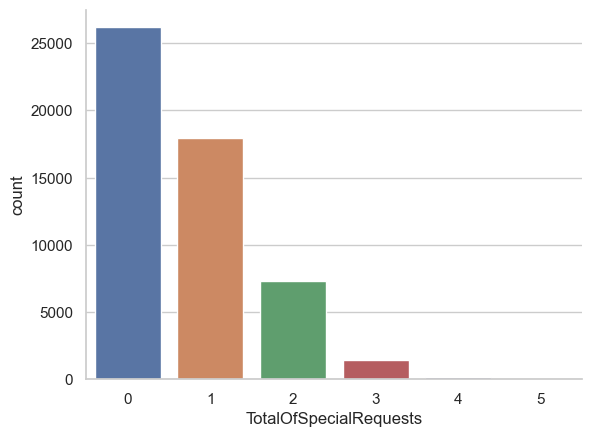

In [158]:
sns.histplot(data=df, x="LeadTime" )
plt.show()

sns.countplot(data=df, x="Adults")
plt.show()

sns.countplot(data=df, x="Children")
plt.show()

sns.countplot(data=df, x="Babies")
plt.show()

sns.countplot(data=df, x="PreviousCancellations")
plt.show()

sns.countplot(data=df, x="PreviousBookingsNotCanceled")
plt.xlim([0, 50])
plt.show()

sns.countplot(data=df, x="BookingChanges")
plt.show()

sns.countplot(data=df, x="DaysInWaitingList")
plt.show()

sns.countplot(data=df, x="RequiredCarParkingSpaces")
plt.show()

sns.countplot(data=df, x="TotalOfSpecialRequests")
plt.show()


### Insights preliminares:

Las variables Children y Babies podemos ver como por encima de las 50.000 observaciones esta variable es 0 por lo que no estarian aportando informacion relevante.En este caso se podria hacer una nueva variable que sea huespedes total equivalente a sumar:Adults+Children+Babies.

Las variables que miden las cancelaciones previas(PreviousCancellations) tampoco pareceria estar ofreciendo mayor informacion pues en mayoria son 0 y lo mismo pasa con PreviousBookingsNotCanceled.

En cuanto a las variables sobre pedidos especiales(TotalofSpecialRequests) si vemos que existen por encima de 15.000 reservas que han tenido algun tipo de pedido especial,por lo que en este caso si nos puede traer informacion relevante.

La variable sobre pedido de lugar para aparcar el coche tampoco nos trae mayor informacion,esto puede ser o bien porque Lisboa no es una ciudad para hacer turismo en coche o porque la mayoria de hoteles no ofrecen este servicio pues no lo tienen disponible.Este variable no aportaria informacion asi que se podria quitar luego.

## Relacion entre variables numericas y variable objetivo

Vamos analizar algunas de las relaciones que mencionamos en el punto anterior entre las variables numericas y sumar a la variable objetivo

### Analisis de Avarage Day Rate

<AxesSubplot: xlabel='MarketSegment', ylabel='count'>

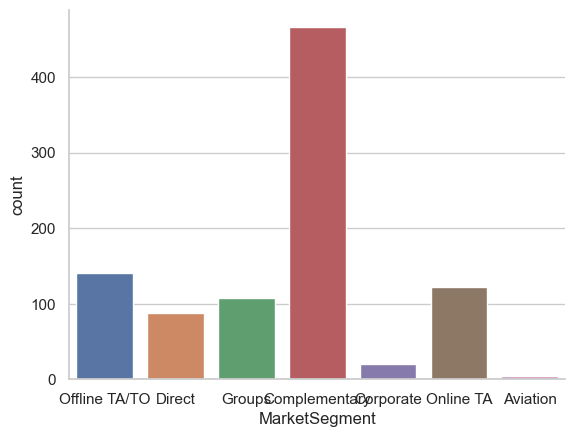

In [159]:
sns.countplot(data=df[(df.ADR == 0)],x="MarketSegment")

Viendo la grafica para aquellas reservas con ADR igual a 0 se aprecia como 480 son marcadas como "Complementary" lo que significa que fueron alguna forma de regalo por lo que tendria sentido que existan observaciones con ADR 0.

### Relacion entre BookingChanges y Leadtime

<AxesSubplot: xlabel='BookingChanges', ylabel='LeadTime'>

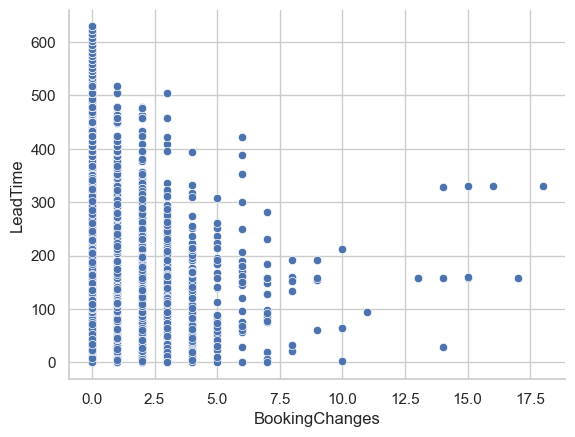

In [160]:
sns.scatterplot(data=df, x="BookingChanges", y="LeadTime")

La hipotesis de que a mayor cantidad de dias para la llegada al alojamiento generaria una mayor cantidad de cambios en la reserva no pareceria cumplirse.

### Relacion entre DaysinWaitingList & Leadtime y variable objetivo

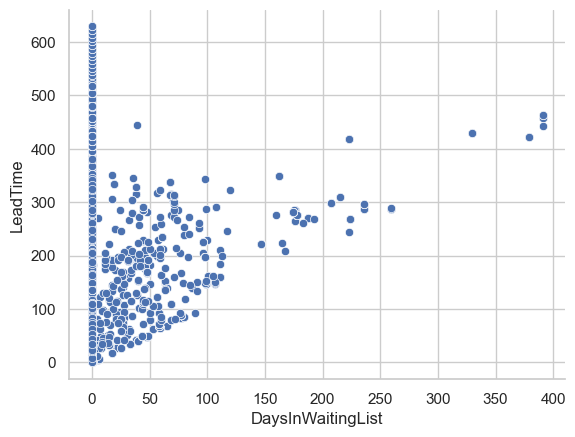

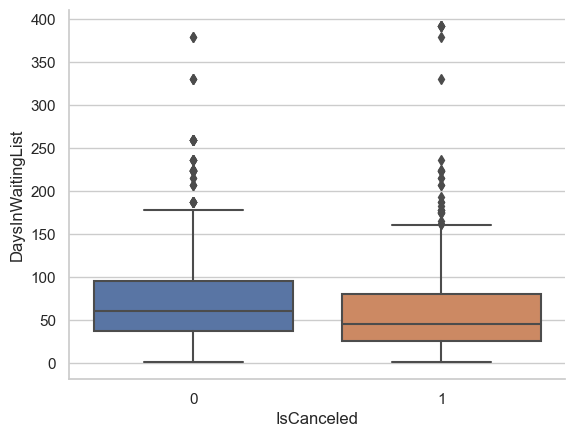

In [161]:
sns.scatterplot(data=df, x="DaysInWaitingList", y="LeadTime")
plt.show()
sns.boxplot(data=df[(df.DaysInWaitingList>=1)], y="DaysInWaitingList", x="IsCanceled")
plt.show()

### Insigths:

1)Estar muchos dias en lista de espera no parece estar relacionado con la variable LeadTime.

2)Estar muchos dias en lista de espera no pareceria tener relacion con una mayor cancelacion de reservas.
Analizando graficamente los datos no parece exisitir una relacion entre los dias de espera para confirmar una reserva y la propension a cancelar,y en este caso las reservas canceladas tienen una mediana menor de dias de espera,es decir que graficamente no se estaria confirmando que la hipotesis de a mayor dias de espera mayor la propension a cancelar.


### Relacion entre Leadtime y variable objetivo:

<AxesSubplot: xlabel='IsCanceled', ylabel='LeadTime'>

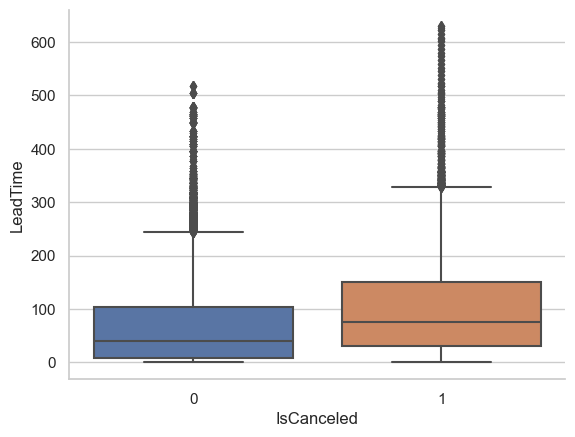

In [162]:
sns.boxplot(data=df, y="LeadTime", x="IsCanceled")

Si parece existir una relacion entre las variables LeadTime y la cancelacion de reservas,en donde a mayor sea la distancia temporal entre el momento de la reserva y el momento de la llegada al alojamiento existe mayor casos de reservas canceladas.

### Relacion entre cambios en la reserva y variable objetivo
¿A mayor cantidad de cambios realizados en una reserva mas propoension a cancelar?

<AxesSubplot: xlabel='IsCanceled', ylabel='BookingChanges'>

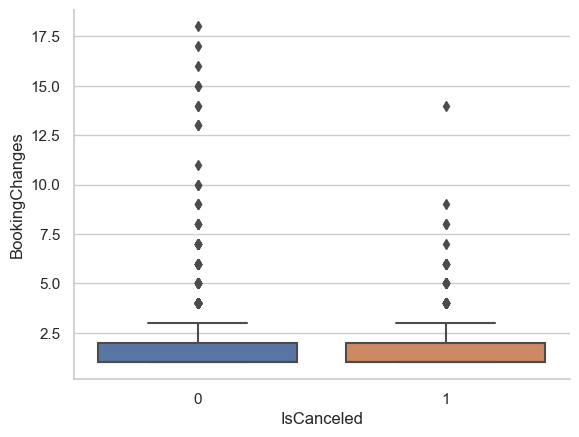

In [163]:
sns.boxplot(data=df[(df.BookingChanges>=1)], y="BookingChanges", x="IsCanceled")

Analizando graficamente los datos no parece exisitir una relacion para pensar que las reservas con cambios sean mas propensas a ser canceladas luego.

## Distribucion de Variables categoricas

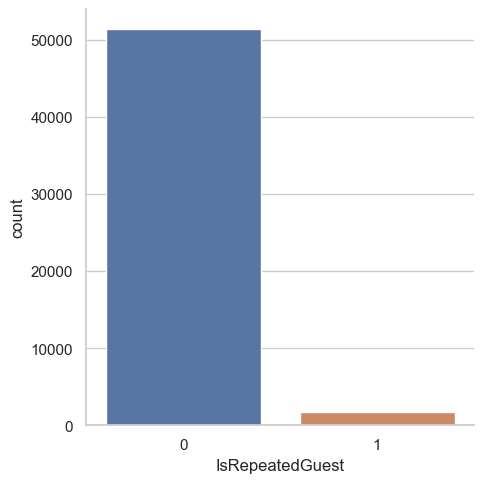

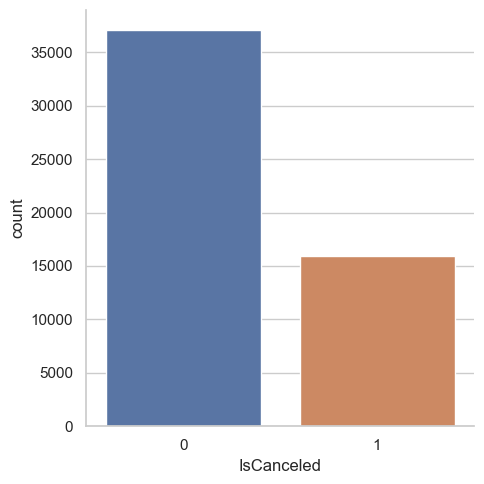

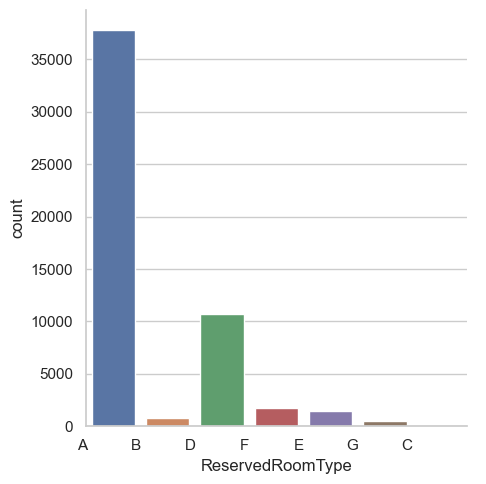

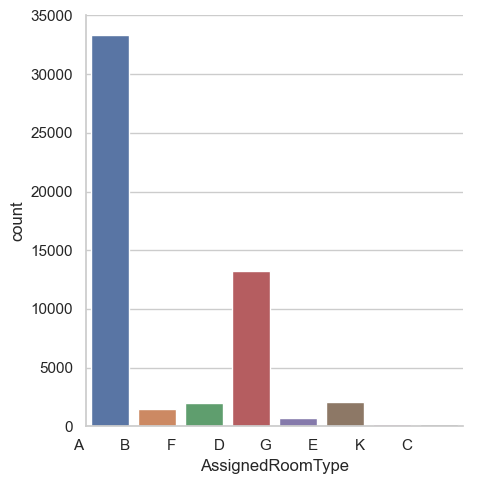

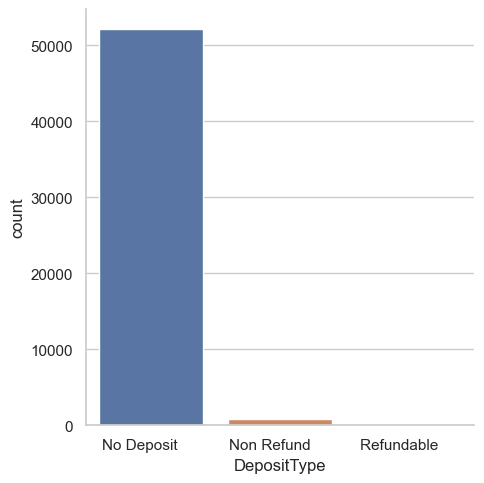

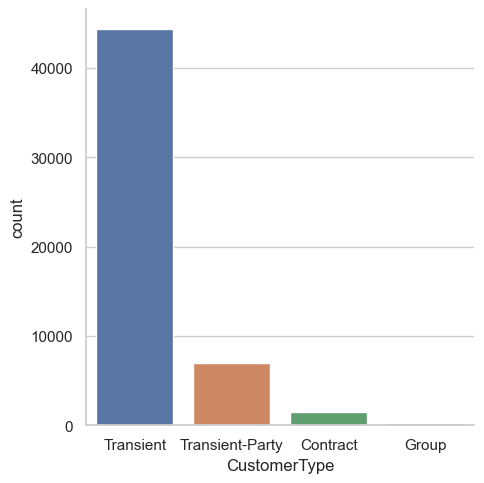

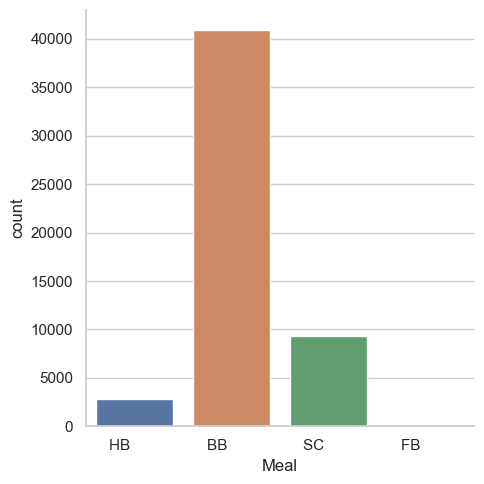

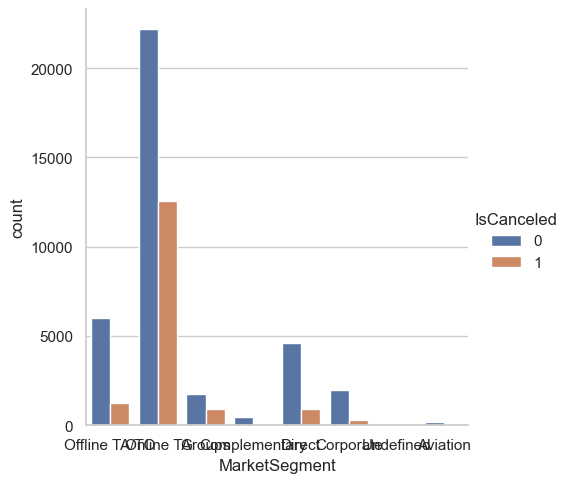

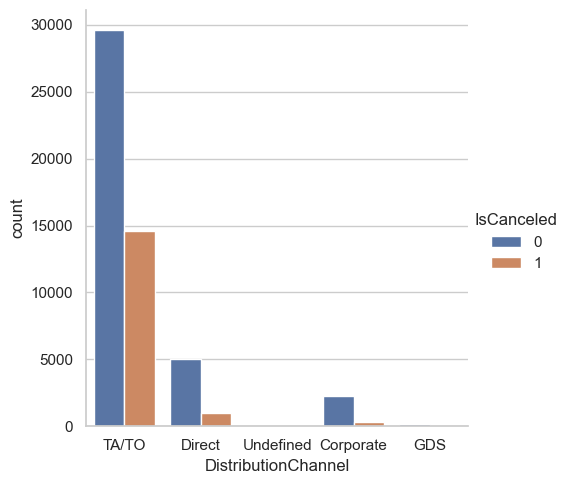

In [164]:
sns.catplot(data=df, x="IsRepeatedGuest", kind="count")
plt.show()

sns.catplot(data=df, x="IsCanceled", kind="count")
plt.show()

sns.catplot(data=df, x="ReservedRoomType", kind="count")
plt.show()

sns.catplot(data=df, x="AssignedRoomType", kind="count")
plt.show()
              
sns.catplot(data=df, x="DepositType", kind="count")
plt.show()
sns.catplot(data=df, x="CustomerType", kind="count")
plt.show()                    
sns.catplot(data=df, x="Meal", kind="count")
plt.show()                                               
sns.catplot(data=df, x="MarketSegment", kind="count",hue="IsCanceled")
plt.show()                            
sns.catplot(data=df, x="DistributionChannel", kind="count",hue="IsCanceled")

plt.show()                            
                            
         

### Insights:

De esto se pueden obtener los siguientes insights:

1)La variable objetivo no esta balanceada en 50% sino que es mas cercano a una relacion de 2/3 de reservas que no cancelaron y 1/3 que si han cancelado.

2)La variable IsRepeatedGuest se concentra en mas de un 90% en personas que no eran clientes de ese establecimiento hotelero previamente.

3)En cuanto a las reservas de cuartos,la mayoria son reservas tipo A,sin embargo existen casos en donde el cuarto asignado es diferente al cuarto reservado.En este caso seria interesante crear una nueva variable dummy que tome valores 1 cuando el cuarto asignado es diferente al cuarto que el huesped habia solicitado,puede que esa variacion genere un disgusto en la persona y decida cancelar la reserva.

4)En cuanto a la forma de pagos ,vemos que existe mas de un 80% reservas realizadas no tienen un adelanto para confirmar esa reserva.Esto puede ser una variable importante,si el cliente al momento de cancelar la reserva no pierde dinero entonces puede tener incentivos a cancelarla,en cambio si la persona pierde dinero al cancelar la reserva puede tener incentivos a mantenerla.De esta forma vamos a crear una nueva variable dummy que indique si el cliente perderia dinero o no al momento de cancelar la reserva.

5)En cuanto a las variables DistributionChannel nos dice que mas de un 80% de las reservas fueron realizadas por un agente de viajes o agencia de turismos,mientras que menos del 10.000 reservas fueron realizadas por otro tipos de agentes.

6)La variable Market Segment es segun la documentacion muy similar a la variable DistributionChannel ademas de tener una distribucion similar.En este caso seria interesante ver si creando una variable dummy que tome valores 1 en caso de ser Online TA que es la categoria que presenta una tasa de cancelacion mas elevada.  

## Analisis de Variables Temporales

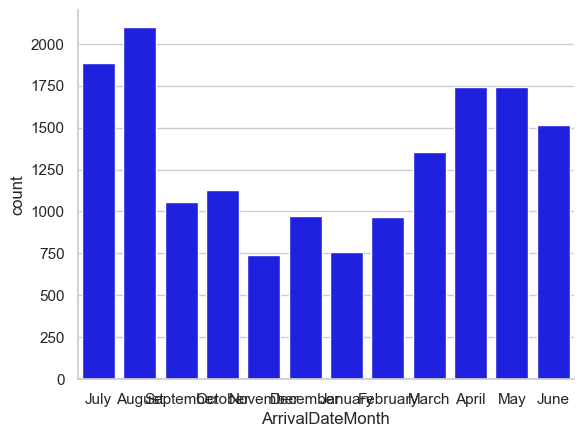

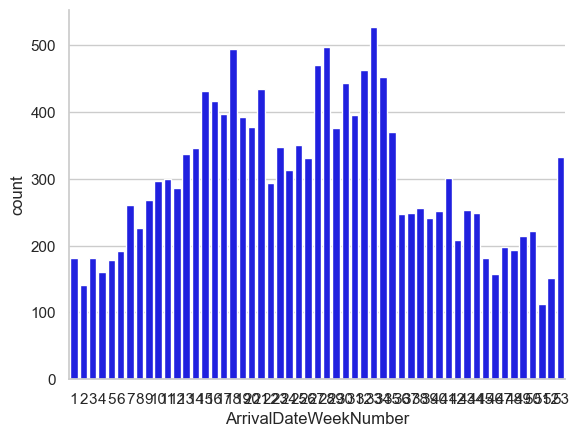

In [165]:

sns.countplot(data=df[(df.IsCanceled == 1)], x="ArrivalDateMonth" ,color='blue')
plt.show()


sns.countplot(data=df[(df.IsCanceled == 1)], x="ArrivalDateWeekNumber" ,color='blue')
plt.show()


Como mencionabamos anteriormente,el mayor numero de reservas ocurre durante el verano,en general durante los meses de Julio y Agosto,por lo que seria interesante agregar esta informacion como una variable categorica que tome valores 1 en caso de que la reserva sea para temporada alta(Junio,Julio Agosto) y 0 para los demas meses.

# Feature Enginering:

### Reduccion de dimensionalidad:

Vamos a quitar variables que a priori nos parecen mostrar nueva informacion relevante para el modelo y reducir la dimensionalidad

1)ArrivalDateYear

2)Company

3)Agent

4)RequiredCarParkingSpaces

5)ReservationStatus

Hay otras variables que vamos a dejar en el dataframe pues las precisamos luego para generar nuevas variables
A su vez vamos a crear 7 nuevas variables:

1)Huespedes:
Nueva variable que suma las variables Adults,Children y Babies.

2)RoomChanged:
Nueva variable para mostrar si el cuarto reservado luego fue cambiado por el establecimiento.

3)PayInAdavence:
Variable dumy que toma valores de 1 en caso de que la reserva haya pagado por adelantado la reserva.

4)OutsidePortugal:
Variable dummy que toma valores 1 en caso que sean reservas hechas en Portugal

5)TotalStay:
Nueva variable que suma las variables de noches entre semana y noches en fin de semana.

6)ReservaenVerano:
Variable dumy que toma valores de 1 en caso de que la reserva sea para los meses de verano

7)MarketSegment1:
Variable que nos permite obtener el perfil de persona que realizo la reserva.Tomara valores de 1 en caso de que haya sido realizada por un perfil Online TA.

### Creacion de nuevas variables:

In [166]:
df['total_guest']=df['Adults']+df['Babies']+df['Children']

df['room_changed'] = np.where(
    df['ReservedRoomType'] != df['AssignedRoomType'], 1,0)

df['pay_in_advanced']=np.where(
    df['DepositType']!="No Deposit",1,0)

df['inside_portugal']=np.where(
    df['Country']=="PRT",1,0)

df['summer_booking'] = np.where(
    df['ArrivalDateMonth'].isin(["July", "June", "August"]), 1, 0)

df['totalstays']=df['StaysInWeekNights']+df['StaysInWeekendNights']

df['MarketSegment_1']=np.where(
    df['MarketSegment'].isin(["Online TA"]), 1, 0)




## Elaboracion de modelo 

Vamos a elebarorar un modelo de regresion logistica tomando el acurracy como referencia de la calidad del modelo.
A su vez tambien vamos a probar con un modelo de regresion logistica tomando en cuenta todas las variables para tener comparar con el modelo con variables nuevas creadas.
A su vez se elaborara una matriz de connfusion y un grafico para agrupar las probabilidades.

Vamos a crear un nuevo dataframe con las nuevas variables y quitando las variables que vimos que no aportarian al modelo

Vamos a crear una variable con numeros completamente aleatorios para luego agregarlos en la regresion.Serviran como metrica de control de la salud de la regresion,en caso de que dieran como variables significativas significaria que hay algo mal en la estimacion del modelo

In [257]:

df['randNumCol'] = np.random.randint(1, 150, df.shape[0])

df.head()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,ReservationStatus,ReservationStatusDate,total_guest,room_changed,pay_in_advanced,inside_portugal,summer_booking,totalstays,MarketSegment_1,randNumCol
0,0,6,2015,July,27,1,0,2,1,0.0,...,Check-Out,2015-07-03,1.0,0,1,1,1,2,0,8
1,1,88,2015,July,27,1,0,4,2,0.0,...,Canceled,2015-07-01,2.0,0,1,1,1,4,1,126
2,1,65,2015,July,27,1,0,4,1,0.0,...,Canceled,2015-04-30,1.0,0,1,1,1,4,1,61
3,1,92,2015,July,27,1,2,4,2,0.0,...,Canceled,2015-06-23,2.0,0,1,1,1,6,1,120
4,1,100,2015,July,27,2,0,2,2,0.0,...,Canceled,2015-04-02,2.0,0,1,1,1,2,1,123


### Baseline Model:

Elaboracion de modelo con todas las variables y tipo de Modelo de DummyClassifier,este seria el modelo que tomaremos como benchmark para mejorar

In [258]:
import numpy as np
from sklearn.dummy import DummyClassifier
X = df.drop('IsCanceled',axis = 1)
y = df['IsCanceled']

# prepare the cross-validation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# create model
model = DummyClassifier(strategy="most_frequent")
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores)*100, std(scores)*100))

Accuracy: 69.933 (0.479)


El modelo baseline arroja un accuracy de 69,9%.Sin embargo,seria interesante obtener  metricas sobre que variables son significativas ,obtener una matriz de confusion y una curva ROC.

### Modelo de Regresion Logisitca con split entre test y train 

### Modelo Sin Estandarizacion:

Accuracy: 0.745
AUC: 0.782


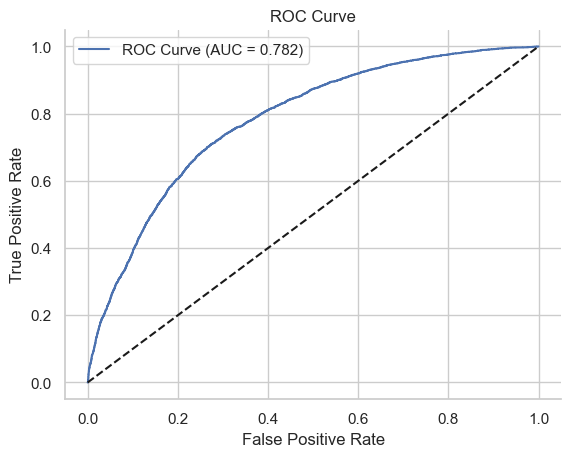

Optimization terminated successfully.
         Current function value: 0.502665
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:             IsCanceled   No. Observations:                37136
Model:                          Logit   Df Residuals:                    37122
Method:                           MLE   Df Model:                           13
Date:                Sun, 12 Mar 2023   Pseudo R-squ.:                  0.1775
Time:                        18:04:43   Log-Likelihood:                -18667.
converged:                       True   LL-Null:                       -22695.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
LeadTime                        0.0057      0.000     35.472      0.000   

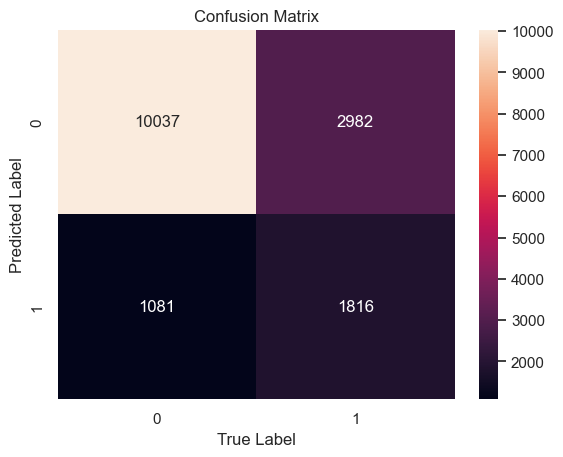

In [259]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import statsmodels.api as sm

# Drop missing values
df = df.dropna()

# Select features and target variable
X = df.drop(['IsCanceled','ArrivalDateYear','Meal','Country','ArrivalDateMonth','MarketSegment', 'DistributionChannel',
               'ArrivalDateWeekNumber','ArrivalDateDayOfMonth','ReservationStatus','ReservationStatusDate',
               'ReservedRoomType','AssignedRoomType','BookingChanges','DepositType','Agent','Company',
               'DaysInWaitingList','CustomerType','randNumCol','Adults','Children','totalstays','RequiredCarParkingSpaces','Babies','total_guest'],axis=1)
y = df['IsCanceled']

# Standardize the features
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Create the logistic regression model
log_reg = LogisticRegression()

# Fit the model on the training data
log_reg.fit(X_train, y_train)

# Make predictions on the test data
y_pred = log_reg.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {:.3f}'.format(accuracy))

# Generate ROC curve and calculate AUC score
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]


#Si quisieramos fijar un umbral usariamos este codigo:
#y_pred_proba=(log_reg.predict_proba(X_test)[:, 1] >= 0.33).astype(int)

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
print('AUC: {:.3f}'.format(auc))

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.3f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Print summary regression
logit_model = sm.Logit(y_train, X_train)
result = logit_model.fit()
print(result.summary())

print('Confusion matrix: \n', confusion_matrix(y_test, y_pred))

cm = confusion_matrix(y_pred,y_test)

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.ylabel("Predicted Label")
plt.xlabel("True Label")
plt.show()


### Insights :

Inferencia:

1)La cantidad de noches reservadas es una variable significativa.

2)Si el huesped es una persona que ya reservo en el hotel tambien lo es,lo cual tiene sentido pues se fija en un patron 
anterior de comportamiento.

3)La variable sobre cancelaciones previas y no cancelacion previas tambien son significativas.Que una persona haya cancelado reservas anteriormente aumenta las posibilidades de futuras cancelaciones mientras que las personas sin cancelaciones previas disminuyen sus posibilidadades de cancelar.

4)El costo por noche tambien lo es al igual que cantidad de pedidos especiales de la habitacion.

5)Por otro lado,no todas las variables nuevas creadas anteriormente generaron valor al modelo,las variable Total_Guest no fue significativa por ejemplo ni tampoco totalstays.

6)El pago por adelantado de alguna parte de la reserva disminuye la posibilidad de cancelarla.

7)Las reservas hechas por personas por el canal Onlie TA generan una posibilidad mas alta de cancelacion.Un punto interesante es sobre la variable de Market_Segment,al incluir esta variable dummy al modelo el AUC aumenta de 
74.5% a 78.6%.

8)La variable randNumCol con numeros aleatorios no fue significativa en parte confirmando la buena estimacion del modelo.

ROC Curve:

A través de la construcción de curvas ROC se muestra el poder predictivo y de discriminación del modelo.El poder discriminatorio es la capacidad del modelo de clasificar correctamente a los sujetos según
hayan tenido o no el evento.En este caso el resultado de AUC fue de 78,6%.

Confusion Matrix:

A partir de la matriz de confusion podemos ver que el modelo seria bueno para clasificar las reservas que no seran canceladas.En este caso,el metodo predict_proba utilizado en este codigo no lo utiliza de forma fija un umbral pero en general para clasificar se puede tomar un nivel(threshold en ingles) para determinar si una observacion sera clasificada dentro del evento o no,y asi poder constriur la matriz.

En nuestro caso,el dataset tenia un 30% de reservas canceladas ,por lo que se podria fijar ese numero,esta clasificaria a una observacion en donde el modelo estima una posibilidad de 0.3 o mas como que la reserva sera cancelada.Este parametro depende en muchas empresas de lo que el negocio decida o tenga como politica.

Ahora si desde negocio son aversos al riesgo,deberiamos fijar un umbral mas elevado,de esa forma tendriamos pocas observaciones clasificadas como canceladas pero posiblemente estemos mas seguros de que van a cancelarse.Para ayudarse con la decision sobre que umbral tomar se puede usar la curva ROC.


### Modelo con Estandarizacion:

Accuracy: 0.751
AUC: 0.787


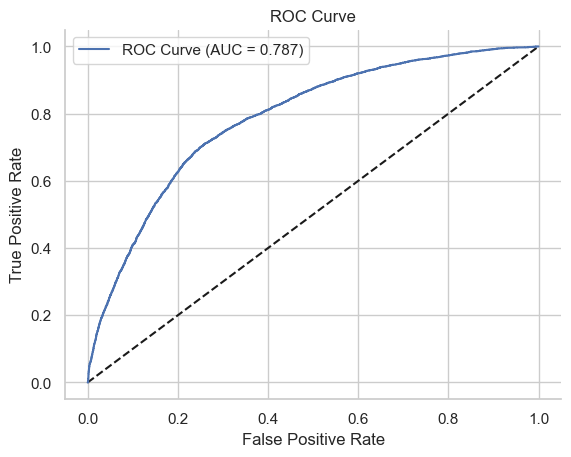

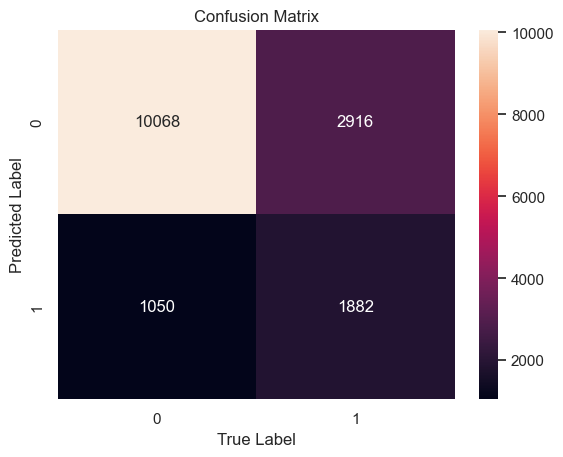

In [242]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import statsmodels.api as sm

# Drop missing values
df = df.dropna()

# Select features and target variable
X = df.drop(['IsCanceled','ArrivalDateYear','Meal','Country','ArrivalDateMonth','MarketSegment', 'DistributionChannel',
               'ArrivalDateWeekNumber','ArrivalDateDayOfMonth','ReservationStatus','ReservationStatusDate',
               'ReservedRoomType','AssignedRoomType','BookingChanges','DepositType','Agent','Company',
               'DaysInWaitingList','CustomerType','randNumCol','Adults','Children','totalstays','RequiredCarParkingSpaces','Babies','total_guest'],axis=1)
y = df['IsCanceled']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=0)

# Create the logistic regression model
log_reg = LogisticRegression()

# Fit the model on the training data
log_reg.fit(X_train, y_train)

# Make predictions on the test data
y_pred = log_reg.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {:.3f}'.format(accuracy))

# Generate ROC curve and calculate AUC score
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
print('AUC: {:.3f}'.format(auc))

# Plot the ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.3f})'.format(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

cm = confusion_matrix(y_pred,y_test)

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.ylabel("Predicted Label")
plt.xlabel("True Label")
plt.show()



### Modelo con K Folds Validation:

Utilizamos un modelo de Regresion Logistica y K folds como cross validation:

Accuracy score:  0.744416171897088
Confusion matrix: 
 [[6694  727]
 [1985 1205]]
Accuracy score:  0.7513900669116954
Confusion matrix: 
 [[6713  707]
 [1931 1260]]
Accuracy score:  0.7520263901979265
Confusion matrix: 
 [[6717  703]
 [1928 1262]]
Accuracy score:  0.7476908576814326
Confusion matrix: 
 [[6675  745]
 [1932 1258]]
Accuracy score:  0.7499528746465598
Confusion matrix: 
 [[6703  717]
 [1936 1254]]


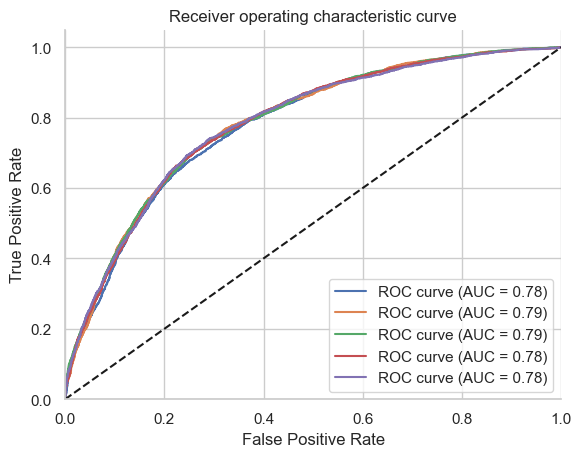

In [250]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, roc_auc_score
df=df.dropna()

# define X and y
X = df.drop(['IsCanceled','ArrivalDateYear','Meal','Country','ArrivalDateMonth','MarketSegment', 'DistributionChannel',
               'ArrivalDateWeekNumber','ArrivalDateDayOfMonth','ReservationStatus','ReservationStatusDate',
               'ReservedRoomType','AssignedRoomType','BookingChanges','DepositType','Agent','Company',
               'DaysInWaitingList','CustomerType','randNumCol','Adults','Children','totalstays','RequiredCarParkingSpaces','Babies','total_guest'],axis=1)
y = df['IsCanceled']

# define logistic regression model
logistic_model = LogisticRegression()

# define k-fold cross-validation method
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# train and evaluate model using k-fold cross-validation
for train_index, test_index in cv.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    logistic_model.fit(X_train, y_train)
    y_pred = logistic_model.predict(X_test)
    y_pred_proba = logistic_model.predict_proba(X_test)[:, 1]
    
    # calculate and print accuracy score and confusion matrix
    print('Accuracy score: ', accuracy_score(y_test, y_pred))
    print('Confusion matrix: \n', confusion_matrix(y_test, y_pred))
    
    # calculate and plot ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
    
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve')
plt.legend(loc="lower right")
plt.show()


### Modelos con K folds validation y estandarizacion

 Ahora vamos a probar lo mismo que antes pero utilizando un modelo de Regresion Logistica con datos estandarizados

Accuracy: 69.933 (0.004)


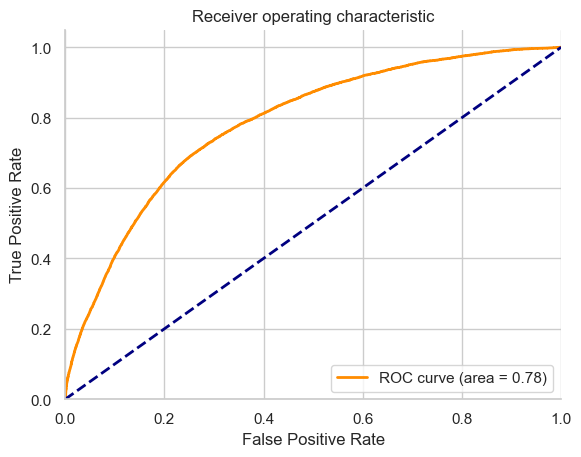

Confusion matrix:
 [[33578  3523]
 [ 9702  6249]]


In [251]:
import numpy as np
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, roc_curve, auc

df=df.dropna()

X_2 = df.drop(['IsCanceled','ArrivalDateYear','Meal','Country','ArrivalDateMonth','MarketSegment', 'DistributionChannel',
               'ArrivalDateWeekNumber','ArrivalDateDayOfMonth','ReservationStatus','ReservationStatusDate',
               'ReservedRoomType','AssignedRoomType','BookingChanges','DepositType','Agent','Company',
               'DaysInWaitingList','CustomerType','randNumCol','Adults','Children','totalstays','RequiredCarParkingSpaces','Babies','total_guest'],axis=1)
y_2 = df['IsCanceled']

steps = list()
steps.append(('scaler', StandardScaler()))
steps.append(('model', LogisticRegression()))
pipeline = Pipeline(steps=steps)

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

# Use cross_val_predict to get predicted labels for the test folds
y_pred = cross_val_predict(pipeline, X_2, y_2, cv=cv, method='predict_proba')

scores = cross_val_score(model, X_2, y_2, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores)*100, std(scores)*100))

# Calculate false positive rate, true positive rate and area under the curve
fpr, tpr, thresholds = roc_curve(y_2, y_pred[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# Calculate confusion matrix
y_pred_labels = np.where(y_pred[:, 1] > 0.5, 1, 0)
cm = confusion_matrix(y_2, y_pred_labels)

# Print confusion matrix
print("Confusion matrix:\n", cm)


# Otros Modelos probados:

#### Modelo utilizando el metodo de SMOTE:

In [215]:
from imblearn.over_sampling import SMOTE
# split data into training and testing sets
X = df.drop(['IsCanceled','ArrivalDateYear','Meal','Country','ArrivalDateMonth','MarketSegment', 'DistributionChannel',
               'ArrivalDateWeekNumber','ArrivalDateDayOfMonth','ReservationStatus','ReservationStatusDate',
               'ReservedRoomType','AssignedRoomType','BookingChanges','DepositType','Agent','Company',
               'DaysInWaitingList','CustomerType','Adults','randNumCol','Children','totalstays','RequiredCarParkingSpaces','Babies','total_guest'],axis=1)
y = df['IsCanceled']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# create artificial data with SMOTE
oversample = SMOTE(sampling_strategy='minority',k_neighbors=5)
X_train_smote, y_train_smote = oversample.fit_resample(X_train, y_train)
# count number of records in each class
count = Counter(y_train_smote)
print(count)
mms = MinMaxScaler()
X_train_smote = mms.fit_transform(X_train_smote)
X_test = mms.transform(X_test)

# create random forest model and generate predictions
rfc = LogisticRegression(random_state=42)
rfc.fit(X_train_smote, y_train_smote)
y_pred_smote = rfc.predict(X_test)

# compute the accuracy
accuracy = np.round(accuracy_score(y_test, y_pred_smote),2)*100
print(f'Accuracy = {accuracy:.2f}')

Counter({0: 25967, 1: 25967})
Accuracy = 70.00


#### Modelo de regresion logistica con RFECV

In [112]:
X_5 = df.drop(['IsCanceled','ArrivalDateYear','Meal','Country',
               'ArrivalDateMonth','MarketSegment','DistributionChannel',
               'ArrivalDateWeekNumber','ArrivalDateDayOfMonth',
               'ReservationStatus','ReservationStatusDate','ReservedRoomType',
               'AssignedRoomType','DepositType','Agent','Company','CustomerType','randNumCol','Children','Adults','Babies',
              'DaysInWaitingList' ,'totalstays' ],axis = 1)

y_5 = df['IsCanceled']

rfe = RFECV(DecisionTreeClassifier())
model = LogisticRegression()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
#pipeline = Pipeline(steps=[('m',model)])
cv = RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)
n_score = cross_val_score(pipeline,X_5,y_5,scoring='accuracy',cv=cv,n_jobs=-1,error_score='raise')
print(mean(n_score)*100,std(n_score)*100)

70.21286934843619 0.2821414301806011


#### Modelo aplicando Grid Search: 

In [73]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
X_6 = df.drop(['IsCanceled','ArrivalDateYear','Meal','Country','ArrivalDateMonth','MarketSegment'
             ,'DistributionChannel','ArrivalDateWeekNumber','ArrivalDateDayOfMonth',
             'ReservationStatus','ReservationStatusDate','ReservedRoomType','randNumCol','AssignedRoomType','DepositType','Agent'
,'Company','CustomerType'],axis = 1)

y_6 = df['IsCanceled']
# define model
model = LogisticRegression()
# define evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define search space
space = dict()
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]
# define search
search = GridSearchCV(model, space, scoring='accuracy', cv=cv)
# execute search
result = search.fit(X, y)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.7448227183163855
Best Hyperparameters: {'C': 1e-05, 'penalty': 'none', 'solver': 'newton-cg'}


## Conclusiones

El modelo logistico agregando variables nuevas mejora considerablemente al modelo original,es interesante el comportamiento de las variables de formas de pago de los clientes y tambien el comportamiento de la variable Market Segment.Las personas que pagan alguna parte de las reserva por adelantado tienen menos posibilidades de cancelar mientras que aquellas personas catalogadas en la variable Market Segment como Online TA tienen mayores tasas de cancelacion.

Hay algunos aspectos a mejorar,como es la fijacion del umbral al momento de calcular la matriz de confusion y los distintos escenarios que presentaria el cambio en el mismo(Tambien cambiaria la curva ROC),por razones de duracion no se contemplo tan a fondo en este notebook,aunque en la practica laboral si se realiza.